# Problem Statement 
### Predict on Crab Age

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
train=pd.read_csv(r"E:\Data_science_Project\Crab_Age_Prediction\train.csv")

In [91]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [93]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [94]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [95]:
train.duplicated().sum()

0

#### Here we can see that Id column is different from tarin and test column so we drop it

In [96]:
train.drop(["id"],axis=1,inplace=True)

In [97]:
corr=train.corr(numeric_only=True)
sns.heatmap(corr)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [98]:
corr

NameError: name 'corr' is not defined

### We can see that there is a coolinearity problem
#### Creat coorelation matrix

In [99]:
corr_matrix=train.corr().abs()

# Select upper triangle of coorelation matrix
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

#Find index of feature columns with coorelation greater then 0.95
to_drop=[column for column in upper.columns if any(upper[column]>0.95)]
print(to_drop)

train.drop(to_drop,axis=1,inplace=True)


['Diameter', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     74051 non-null  object 
 1   Length  74051 non-null  float64
 2   Height  74051 non-null  float64
 3   Weight  74051 non-null  float64
 4   Age     74051 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


<AxesSubplot:>

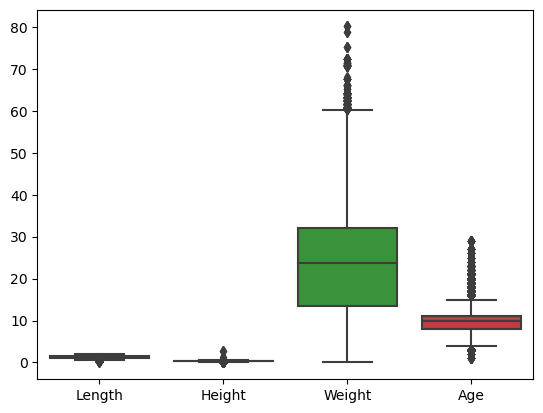

In [101]:
sns.boxplot(data=train)

### Dealing with Outliers

In [102]:
Q3=train["Length"].quantile(0.75)

In [103]:
Q1=train["Length"].quantile(0.25)

In [104]:
IQR=Q3-Q1

In [105]:
lower_limit=Q1-(1.5*IQR)

In [106]:
upper_limit=Q3-(1.5*IQR)

In [107]:
train["replaced_Length"]=pd.DataFrame(np.where(train["Length"]>upper_limit,upper_limit,np.where(train["Length"]<lower_limit,lower_limit,train["Length"])))

In [108]:
train.drop(["Length"],axis=1,inplace=True)

In [109]:
train.rename(columns={"replaced_Lenght": "Lenght"},inplace=True)

In [110]:
Q3=train["Weight"].quantile(0.75)
Q1=train["Weight"].quantile(0.25)
IQR=Q3-Q1

In [111]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3-(1.5*IQR)

In [112]:
train["replaced_Weight"]=pd.DataFrame(np.where(train["Weight"]>upper_limit,upper_limit,np.where(train["Weight"]<lower_limit,lower_limit,train["Weight"])))
train.drop(["Weight"],axis=1,inplace=True)
train.rename(columns={"replaced_Weight": "Weight"},inplace=True)

In [113]:
Q3=train["Age"].quantile(0.75)
Q1=train["Age"].quantile(0.25)
IQR=Q3-Q1

In [114]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3-(1.5*IQR)

In [115]:
train["replaced_Age"]=pd.DataFrame(np.where(train["Age"]>upper_limit,upper_limit,np.where(train["Age"]<lower_limit,lower_limit,train["Age"])))
train.drop(["Age"],axis=1,inplace=True)
train.rename(columns={"replaced_Age": "Age"},inplace=True)

In [116]:
Q3=train["Height"].quantile(0.75)
Q1=train["Height"].quantile(0.25)
IQR=Q3-Q1

In [117]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3-(1.5*IQR)

In [118]:
train["replaced_Height"]=pd.DataFrame(np.where(train["Height"]>upper_limit,upper_limit,np.where(train["Height"]<lower_limit,lower_limit,train["Height"])))
train.drop(["Height"],axis=1,inplace=True)
train.rename(columns={"replaced_Height": "Height"},inplace=True)

In [119]:
train.head()

,Sex,replaced_Length,Weight,Age,Height
0,I,0.95625,4.075241,6.5,0.24375
1,I,0.95625,4.075241,6.5,0.24375
2,M,0.95625,4.075241,6.5,0.24375
3,F,0.95625,4.075241,6.5,0.24375
4,I,0.95625,4.075241,6.5,0.24375


In [120]:
column_to_move = train.pop(train.columns[3])

In [121]:
train.insert(len(train.columns), column_to_move.name, column_to_move)

In [122]:
train.head()

,Sex,replaced_Length,Weight,Height,Age
0,I,0.95625,4.075241,0.24375,6.5
1,I,0.95625,4.075241,0.24375,6.5
2,M,0.95625,4.075241,0.24375,6.5
3,F,0.95625,4.075241,0.24375,6.5
4,I,0.95625,4.075241,0.24375,6.5


In [123]:
train.shape

(74051, 5)

In [124]:
train["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

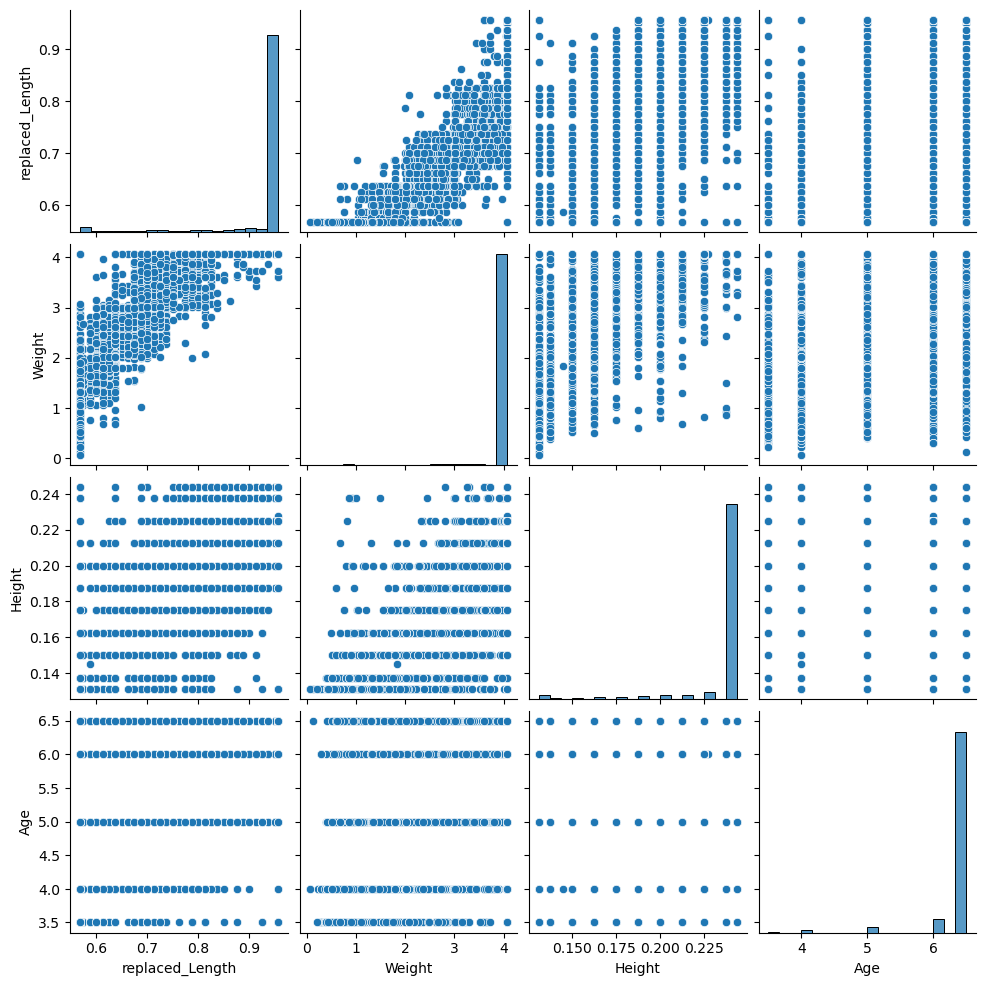

In [125]:
sns.pairplot(data=train)

### Ordinal encode columns 

In [126]:
from sklearn.preprocessing import OrdinalEncoder

In [127]:
enc=OrdinalEncoder()

for col in train:
    if train[col].dtype=='object':
        train[col]=enc.fit_transform(train[col].values.reshape(-1,1))
    
train

,Sex,replaced_Length,Weight,Height,Age
0,1.0,0.95625,4.075241,0.24375,6.5
1,1.0,0.95625,4.075241,0.24375,6.5
2,2.0,0.95625,4.075241,0.24375,6.5
3,0.0,0.95625,4.075241,0.24375,6.5
4,1.0,0.95625,4.075241,0.24375,6.5
...,...,...,...,...,...
74046,0.0,0.95625,4.075241,0.24375,6.5
74047,1.0,0.95625,4.075241,0.24375,6.0
74048,0.0,0.95625,4.075241,0.24375,6.5
74049,1.0,0.95625,4.075241,0.24375,6.5


In [128]:
print(train.columns)

Index(['Sex', 'replaced_Length', 'Weight', 'Height', 'Age'], dtype='object')


In [129]:
X=train[['Sex','replaced_Length','Weight','Height']]

In [130]:
Y=train["Age"]

In [200]:
Y.shape

(74051,)

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              74051 non-null  float64
 1   replaced_Length  74051 non-null  float64
 2   Weight           74051 non-null  float64
 3   Height           74051 non-null  float64
 4   Age              74051 non-null  float64
dtypes: float64(5)
memory usage: 2.8 MB


In [153]:
train["Age"] = train["Age"].round().astype(int)

In [154]:
train.head()

,Sex,replaced_Length,Weight,Height,Age
0,1.0,0.95625,4.075241,0.24375,6
1,1.0,0.95625,4.075241,0.24375,6
2,2.0,0.95625,4.075241,0.24375,6
3,0.0,0.95625,4.075241,0.24375,6
4,1.0,0.95625,4.075241,0.24375,6


#### Spliting the Data

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model=LinearRegression()

In [159]:
X_train.shape

(59240, 4)

In [160]:
X_test.shape

(14811, 4)

In [161]:
y_train.shape

(59240,)

In [162]:
y_test.shape

(14811,)

In [163]:
model.fit(X_train,y_train)

LinearRegression()

In [164]:
# Make predictions on the validation set
train_lr_pred = model.predict(X_train)

In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_train,train_lr_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.04863750886924437


In [167]:
# Make predictions on the test set
test_lr_pred = model.predict(X_test)
test_lr_pred

array([6.48915054, 5.24223497, 6.49143939, ..., 6.49143939, 5.48127682,
       6.49143939])

In [168]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test,test_lr_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.051748181963239014


In [190]:
import statsmodels.formula.api as smf

In [191]:
smf_ml=smf.ols("Age ~ Height+Weight+replaced_Length+Sex",data=train).fit()

In [192]:
smf_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.578e+04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:57:44   Log-Likelihood:                 25262.
No. Observations:               74051   AIC:                        -5.051e+04
Df Residuals:                   74046   BIC:                        -5.047e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6376      0.009    411.360      0.000       3.620       3.655
Height              0.9450      0.082     11.542      0.000       0.785       1.105
Weight              0.3581      0.003    125.044      0.000       0.352       0.364
replaced_Length     0.7036      0.028     24.875      0.000       0.648       0.759
Sex                 0.0011      0.001      1.425      0.154      -0.000       0.003
==============================================================================
Omnibus:                    30551.250   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4071735.751
Skew:                          -0.962   Prob(JB):                         0.00
Kurtosis:                      39.276   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
smf_pred=smf_ml.predict(train)

In [197]:
smf_predicted_values = smf_ml.fittedvalues

In [198]:
print(smf_predicted_values)

0        6.001120
1        6.001120
2        6.002218
3        6.000022
4        6.001120
           ...   
74046    6.000022
74047    6.001120
74048    6.000022
74049    6.001120
74050    5.928993
Length: 74051, dtype: float64


In [201]:
smf_predicted_values.shape

(74051,)

In [207]:
new_df=pd.DataFrame({"Actual_1":y_test,"Lr_predicted":test_lr_pred})

In [206]:
new_df2=pd.DataFrame({"Actual_2":Y,"smf_pred":smf_predicted_values})

In [208]:
new_df.head(20) # LR Model

,Actual_1,Lr_predicted
27233,6.5,6.489151
55493,6.0,5.242235
49980,6.5,6.491439
28319,6.5,6.489151
20212,6.5,6.489151
5048,6.5,6.491439
57436,6.5,6.491439
52779,6.5,6.489151
454,6.5,6.491439
32248,6.5,6.491439


In [210]:
new_df2.head(20) # smf model 

,Actual_2,smf_pred
0,6.5,6.001120
1,6.5,6.001120
2,6.5,6.002218
3,6.5,6.000022
4,6.5,6.001120
5,6.5,6.002218
6,6.5,6.002218
7,6.5,6.001120
8,6.5,6.000022
9,6.5,6.002218
